In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
flat_chess = cv2.imread('C://Users/86188/Desktop/Python Data/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

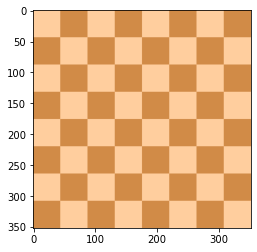

In [6]:
plt.imshow(flat_chess)

In [7]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

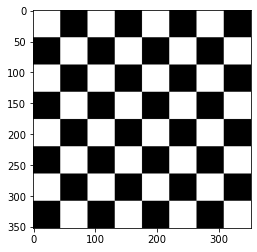

In [10]:
plt.imshow(gray_flat_chess,cmap='gray')

In [11]:
real_chess = cv2.imread('C://Users/86188/Desktop/Python Data/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

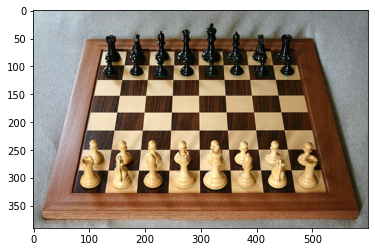

In [12]:
plt.imshow(real_chess)

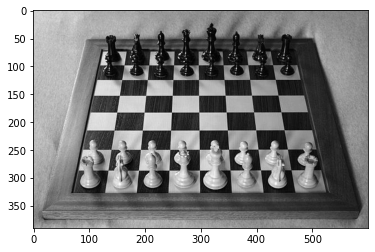

In [13]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [14]:
gray = np.float32(gray_flat_chess)

In [15]:
gray 

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [16]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [18]:
dst = cv2.dilate(dst,None)

In [19]:
flat_chess[dst>0.01*dst.max()] = [255,0,0] 

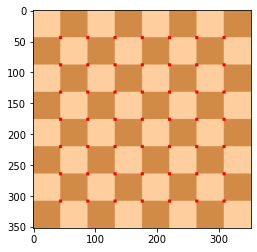

In [20]:
plt.imshow(flat_chess)

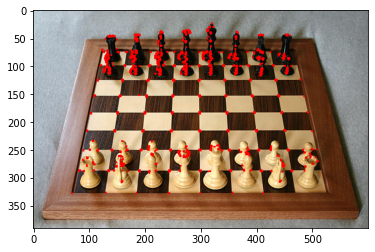

In [21]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()] = [255,0,0] 
plt.imshow(real_chess)

In [22]:
real_chess = cv2.imread('C://Users/86188/Desktop/Python Data/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('C://Users/86188/Desktop/Python Data/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [35]:
# image: 输入图像，是八位的或者32位浮点型，单通道图像，所以有时候用灰度图
# maxCorners: 返回最大的角点数，是最有可能的角点数，如果这个参数不大于0，那么表示没有角点数的限制。
# qualityLevel: 图像角点的最小可接受参数，质量测量值乘以这个参数就是最小特征值，小于这个数的会被抛弃。
# minDistance: 返回的角点之间最小的欧式距离。
# mask: 检测区域。如果图像不是空的(它需要具有CV_8UC1类型和与图像相同的大小)，它指定检测角的区域。
# blockSize: 用于计算每个像素邻域上的导数协变矩阵的平均块的大小。
# useHarrisDetector：选择是否采用Harris角点检测，默认是false.
# k: Harris检测的自由参数。
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)

In [36]:
corners = np.int0(corners)

In [37]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]]], dtype=int64)

In [38]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

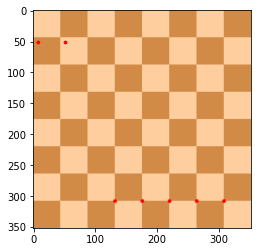

In [39]:
plt.imshow(flat_chess)

In [40]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)

In [41]:
corners = np.int0(corners)

In [42]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0))

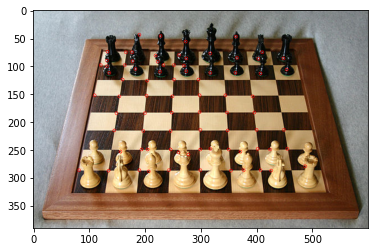

In [43]:
plt.imshow(real_chess)